In [1]:
#Xception Model 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers.legacy import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
        'imgs/train',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    'imgs/test',
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical')

# Load the pre-trained Xception model with ImageNet weights
base_model = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add some layers on top of the base model for classification
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(33, activation='softmax')(x)

# Create the final model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the weights of the pre-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the checkpoint path and directory
checkpoint_path = "./.ipynb_checkpoints"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Define the callbacks for early stopping and saving checkpoints
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint(
                                filepath=checkpoint_path,
                                verbose=1,
                                save_weights_only=True,
                                save_freq=2)
]

Found 1367 images belonging to 33 classes.
Found 325 images belonging to 33 classes.


In [2]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 32, 32, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 32, 32, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 32, 32, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 16, 16, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 16, 16, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 16, 16, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 16, 16, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 16, 16, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 16, 16, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 16, 16, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 16, 16, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 16, 16, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [8]:
# Train the model
history = model.fit(train_generator,
                              epochs=30,
                              validation_data=test_generator,
                              callbacks=callbacks,
                              verbose=1)


Epoch 1/30
 1/43 [..............................] - ETA: 5:40 - loss: 0.3658 - accuracy: 0.8750
Epoch 1: saving model to .\.ipynb_checkpoints
 3/43 [=>............................] - ETA: 3:52 - loss: 0.2456 - accuracy: 0.9062
Epoch 1: saving model to .\.ipynb_checkpoints
 5/43 [==>...........................] - ETA: 3:39 - loss: 0.2226 - accuracy: 0.9187
Epoch 1: saving model to .\.ipynb_checkpoints
 7/43 [===>..........................] - ETA: 3:24 - loss: 0.2193 - accuracy: 0.9152
Epoch 1: saving model to .\.ipynb_checkpoints
 9/43 [=====>........................] - ETA: 3:14 - loss: 0.2261 - accuracy: 0.9132
Epoch 1: saving model to .\.ipynb_checkpoints
11/43 [======>.......................] - ETA: 3:05 - loss: 0.2140 - accuracy: 0.9176
Epoch 1: saving model to .\.ipynb_checkpoints
13/43 [========>.....................] - ETA: 2:51 - loss: 0.2075 - accuracy: 0.9189
Epoch 1: saving model to .\.ipynb_checkpoints
15/43 [=========>....................] - ETA: 2:44 - loss: 0.2076 - accu

37/43 [========================>.....] - ETA: 36s - loss: 0.2303 - accuracy: 0.9140
Epoch 3: saving model to .\.ipynb_checkpoints
39/43 [==========================>...] - ETA: 23s - loss: 0.2267 - accuracy: 0.9161
Epoch 3: saving model to .\.ipynb_checkpoints
41/43 [===========================>..] - ETA: 11s - loss: 0.2198 - accuracy: 0.9186
Epoch 3: saving model to .\.ipynb_checkpoints
43/43 [==============================] - 305s 7s/step - loss: 0.2222 - accuracy: 0.9188 - val_loss: 0.1856 - val_accuracy: 0.9262
Epoch 4/30

Epoch 4: saving model to .\.ipynb_checkpoints
 2/43 [>.............................] - ETA: 3:21 - loss: 0.1836 - accuracy: 0.9531
Epoch 4: saving model to .\.ipynb_checkpoints
 4/43 [=>............................] - ETA: 3:46 - loss: 0.1813 - accuracy: 0.9297
Epoch 4: saving model to .\.ipynb_checkpoints
 6/43 [===>..........................] - ETA: 3:38 - loss: 0.2109 - accuracy: 0.9323
Epoch 4: saving model to .\.ipynb_checkpoints
 8/43 [====>.................

30/43 [===================>..........] - ETA: 1:23 - loss: 0.1529 - accuracy: 0.9338
Epoch 6: saving model to .\.ipynb_checkpoints
32/43 [=====================>........] - ETA: 1:10 - loss: 0.1541 - accuracy: 0.9330
Epoch 6: saving model to .\.ipynb_checkpoints
34/43 [======================>.......] - ETA: 58s - loss: 0.1496 - accuracy: 0.9351 
Epoch 6: saving model to .\.ipynb_checkpoints
36/43 [========================>.....] - ETA: 44s - loss: 0.1594 - accuracy: 0.9318
Epoch 6: saving model to .\.ipynb_checkpoints
38/43 [=========================>....] - ETA: 31s - loss: 0.1657 - accuracy: 0.9287
Epoch 6: saving model to .\.ipynb_checkpoints
40/43 [==========================>...] - ETA: 19s - loss: 0.1673 - accuracy: 0.9284
Epoch 6: saving model to .\.ipynb_checkpoints
42/43 [============================>.] - ETA: 6s - loss: 0.1663 - accuracy: 0.9296 
Epoch 6: saving model to .\.ipynb_checkpoints
43/43 [==============================] - 335s 8s/step - loss: 0.1692 - accuracy: 0.9298

21/43 [=============>................] - ETA: 2:29 - loss: 0.2198 - accuracy: 0.9216
Epoch 9: saving model to .\.ipynb_checkpoints
23/43 [===============>..............] - ETA: 2:17 - loss: 0.2186 - accuracy: 0.9202
Epoch 9: saving model to .\.ipynb_checkpoints
25/43 [================>.............] - ETA: 2:05 - loss: 0.2143 - accuracy: 0.9216
Epoch 9: saving model to .\.ipynb_checkpoints
27/43 [=================>............] - ETA: 1:50 - loss: 0.2052 - accuracy: 0.9240
Epoch 9: saving model to .\.ipynb_checkpoints
29/43 [===================>..........] - ETA: 1:36 - loss: 0.2074 - accuracy: 0.9227
Epoch 9: saving model to .\.ipynb_checkpoints
31/43 [====================>.........] - ETA: 1:22 - loss: 0.2267 - accuracy: 0.9207
Epoch 9: saving model to .\.ipynb_checkpoints
33/43 [======================>.......] - ETA: 1:08 - loss: 0.2258 - accuracy: 0.9179
Epoch 9: saving model to .\.ipynb_checkpoints
35/43 [=======================>......] - ETA: 54s - loss: 0.2243 - accuracy: 0.9181

12/43 [=======>......................] - ETA: 3:24 - loss: 0.1378 - accuracy: 0.9453
Epoch 12: saving model to .\.ipynb_checkpoints
14/43 [========>.....................] - ETA: 3:18 - loss: 0.1559 - accuracy: 0.9442
Epoch 12: saving model to .\.ipynb_checkpoints
16/43 [==========>...................] - ETA: 3:06 - loss: 0.1548 - accuracy: 0.9453
Epoch 12: saving model to .\.ipynb_checkpoints
18/43 [===========>..................] - ETA: 2:52 - loss: 0.1496 - accuracy: 0.9462
Epoch 12: saving model to .\.ipynb_checkpoints
20/43 [============>.................] - ETA: 2:35 - loss: 0.1622 - accuracy: 0.9391
Epoch 12: saving model to .\.ipynb_checkpoints
22/43 [==============>...............] - ETA: 2:20 - loss: 0.1566 - accuracy: 0.9432
Epoch 12: saving model to .\.ipynb_checkpoints
24/43 [===============>..............] - ETA: 2:05 - loss: 0.1546 - accuracy: 0.9427
Epoch 12: saving model to .\.ipynb_checkpoints
26/43 [=================>............] - ETA: 1:50 - loss: 0.1567 - accuracy

 1/43 [..............................] - ETA: 5:15 - loss: 0.3470 - accuracy: 0.9062
Epoch 15: saving model to .\.ipynb_checkpoints
 3/43 [=>............................] - ETA: 3:51 - loss: 0.2242 - accuracy: 0.9375
Epoch 15: saving model to .\.ipynb_checkpoints
 5/43 [==>...........................] - ETA: 3:33 - loss: 0.1785 - accuracy: 0.9375
Epoch 15: saving model to .\.ipynb_checkpoints
 7/43 [===>..........................] - ETA: 3:36 - loss: 0.1427 - accuracy: 0.9554
Epoch 15: saving model to .\.ipynb_checkpoints
 9/43 [=====>........................] - ETA: 3:30 - loss: 0.1333 - accuracy: 0.9514
Epoch 15: saving model to .\.ipynb_checkpoints
11/43 [======>.......................] - ETA: 3:21 - loss: 0.1214 - accuracy: 0.9602
Epoch 15: saving model to .\.ipynb_checkpoints
13/43 [========>.....................] - ETA: 3:02 - loss: 0.1303 - accuracy: 0.9591
Epoch 15: saving model to .\.ipynb_checkpoints
15/43 [=========>....................] - ETA: 2:48 - loss: 0.1380 - accuracy

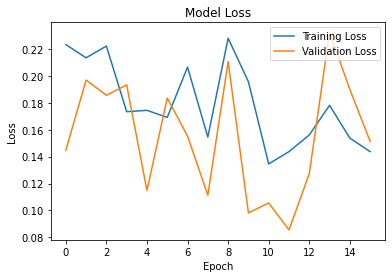

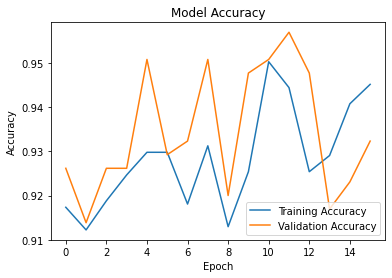

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [10]:
import numpy as np

# After training, use the model to make predictions on test data
predictions = model.predict(test_generator)

# Define a dictionary to map class indices to class names
class_labels = {
    0: 'pubescent bamboo',
    1: 'Chinese horse chestnut',
    2: 'Anhui Barberry',
    3: 'Chinese redbud',
    4: 'true indigo',
    5: 'Japanese maple',
    6: 'Nanmu',
    7: 'castor aralia',
    8: 'Chinese cinnamon',
    9: 'goldenrain tree',
    10: 'Big-fruited Holly',
    11: 'Japanese cheesewood',
    12: 'wintersweet',
    13: 'camphortree',
    14: 'Japan Arrowwood',
    15: 'sweet osmanthus',
    16: 'deodar',
    17: 'ginkgo',
    18: 'maidenhair tree',
    19: 'Crape myrtle,Crepe myrtle',
    20: 'oleander',
    21: 'yew plum pine',
    22: 'Japanese Flowering Cherry',
    23: 'Glossy Privet',
    24: 'Chinese Toon',
    25: 'peach',
    26: 'Ford Woodlotus',
    27: 'trident maple',
    28: 'Beales barberry',
    29: 'southern magnolia',
    30: 'Canadian poplar',
    31: 'Chinese tulip tree',
    32: 'tangerine',

}

# Loop through the predictions and print the results with class names
for i, prediction in enumerate(predictions):
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    probability = prediction[predicted_class_index]
    
    print(f"Image {i + 1}: Predicted Class: {predicted_class}, Probability: {probability:.4f}")


11/11 [==============================] - 55s 5s/step
Image 1: Predicted Class: camphortree, Probability: 1.0000
Image 2: Predicted Class: trident maple, Probability: 0.9989
Image 3: Predicted Class: Chinese redbud, Probability: 0.5974
Image 4: Predicted Class: Japan Arrowwood, Probability: 1.0000
Image 5: Predicted Class: Beales barberry, Probability: 1.0000
Image 6: Predicted Class: Crape myrtle,Crepe myrtle, Probability: 0.8249
Image 7: Predicted Class: Chinese horse chestnut, Probability: 0.9999
Image 8: Predicted Class: camphortree, Probability: 1.0000
Image 9: Predicted Class: Glossy Privet, Probability: 0.9999
Image 10: Predicted Class: Japanese maple, Probability: 1.0000
Image 11: Predicted Class: peach, Probability: 0.6910
Image 12: Predicted Class: Chinese redbud, Probability: 0.5315
Image 13: Predicted Class: Crape myrtle,Crepe myrtle, Probability: 0.9999
Image 14: Predicted Class: Japan Arrowwood, Probability: 1.0000
Image 15: Predicted Class: Big-fruited Holly, Probability:

1/1 [==============================] - 0s 101ms/step
Predicted Class: Chinese tulip tree, Probability: 1.0000


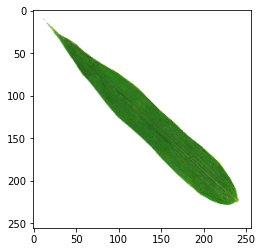

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Replace 'image_path' with the path to your single image
image_path = "standardleaves\\1.jpg"

# Load the image
img = image.load_img(image_path, target_size=(256, 256))
plt.imshow(img)

img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)


# Make predictions for the single image
predictions = model.predict(img)

# Define a dictionary to map class indices to class names starting from index 1
class_labels = {
    0: 'pubescent bamboo',
    1: 'Chinese horse chestnut',
    2: 'Anhui Barberry',
    3: 'Chinese redbud',
    4: 'true indigo',
    5: 'Japanese maple',
    6: 'Nanmu',
    7: 'castor aralia',
    8: 'Chinese cinnamon',
    9: 'goldenrain tree',
    10: 'Big-fruited Holly',
    11: 'Japanese cheesewood',
    12: 'wintersweet',
    13: 'camphortree',
    14: 'Japan Arrowwood',
    15: 'sweet osmanthus',
    16: 'deodar',
    17: 'ginkgo',
    18: 'maidenhair tree',
    19: 'Crape myrtle,Crepe myrtle',
    20: 'oleander',
    21: 'yew plum pine',
    22: 'Japanese Flowering Cherry',
    23: 'Glossy Privet',
    24: 'Chinese Toon',
    25: 'peach',
    26: 'Ford Woodlotus',
    27: 'trident maple',
    28: 'Beales barberry',
    29: 'southern magnolia',
    30: 'Canadian poplar',
    31: 'Chinese tulip tree',
    32: 'tangerine',
   
}

# Convert the predicted class index to match the dictionary
predicted_class_index = np.argmax(predictions) + 1
predicted_class = class_labels[predicted_class_index]
probability = predictions[0][predicted_class_index - 1]

print(f"Predicted Class: {predicted_class}, Probability: {probability:.4f}")
